In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np
#import altair as alt
import matplotlib.pyplot as plt

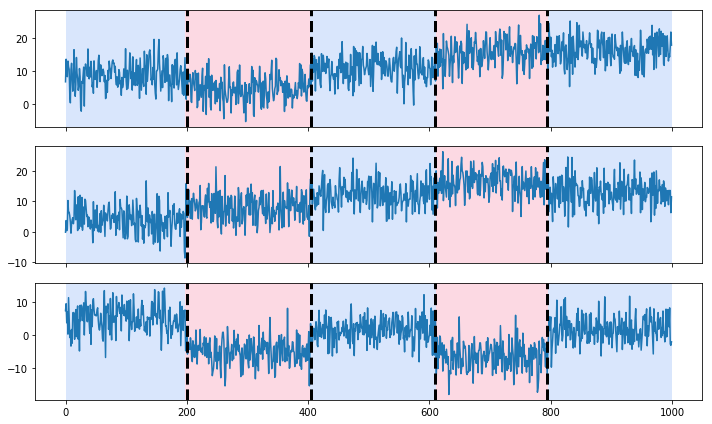

In [6]:
import matplotlib.pyplot as plt
import ruptures as rpt

# generate signal
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, bkps, result)
plt.show()

In [10]:
#df = pd.read_csv("/home/jjschued/Documents/womensrace.csv")
df = pd.read_csv("C:/Users/jjschued/Documents/SMU/7333 QTW/womensrace.csv")
# verify data read in
df.tail(100)

C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,0,year,place,div_total,name,age,hometown,time,pace,numId,guntime,netTime,combtime
78227,9637,9631 1342/1366 18854 Tiffany Tefft ...,2012,9631,1342/1366,Tiffany Tefft,35,Woodbridge VA,NaN,3:44,18854,2:17:18,NaN,2:17:18
78228,9638,9632 1343/1366 19122 Kathleen Talbot ...,2012,9632,1343/1366,Kathleen Talbot,38,Mount Rainier MD,NaN,3:44,19122,2:17:19,NaN,2:17:19
78229,9639,9633 1344/1366 11080 Barbara Brown ...,2012,9633,1344/1366,Barbara Brown,37,Chesapeake Beach MD,NaN,3:44,11080,2:17:20,NaN,2:17:20
78230,9640,9634 1345/1366 21079 Brenda K Ritzco ...,2012,9634,1345/1366,Brenda K Ritzco,39,Dallas TX,NaN,3:44,21079,2:17:20,NaN,2:17:20
78231,9641,9635 2206/2228 18849 Susan Alarcon ...,2012,9635,2206/2228,Susan Alarcon,34,Arlington VA,NaN,3:45,18849,2:17:27,NaN,2:17:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78322,9732,9726 973/974 19016 Khristina Nava ...,2012,9726,973/974,Khristina Nava,40,Fort Meade MD,NaN,5:20,19016,2:33:11,NaN,2:33:11
78323,9733,9727 2228/2228 8258 Geneva Dixon ...,2012,9727,2228/2228,Geneva Dixon,31,Manassas Park VA,NaN,5:37,8258,2:36:03,NaN,2:36:03
78324,9734,9728 236/236 23195 Veronica Eligan ...,2012,9728,236/236,Veronica Eligan,55,Mitchellville MD,NaN,5:41,23195,2:36:45,NaN,2:36:45
78325,9735,9729 974/974 17855 Denise Bobba ...,2012,9729,974/974,Denise Bobba,40,Herndon VA,NaN,5:42,17855,2:36:54,NaN,2:36:54


In [ ]:
points=np.array(df['WTI_Price'])

In [ ]:
import matplotlib.pyplot as plt
import ruptures as rpt

# generate signal
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, bkps, result)
plt.show()

In [11]:
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    api: API that we're connected to
    series_ID: string. Name of the series that we want to pull from the EIA API
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df




Functions:
lowess Fit a smooth nonparametric regression curve to a scatterplot.
For more information, see
William S. Cleveland: "Robust locally weighted regression and smoothing
scatterplots", Journal of the American Statistical Association, December 1979,
volume 74, number 368, pp. 829-836.
William S. Cleveland and Susan J. Devlin: "Locally weighted regression: An
approach to regression analysis by local fitting", Journal of the American
Statistic al Association, September 1988, volume 83, number 403, pp. 596-610.
"""

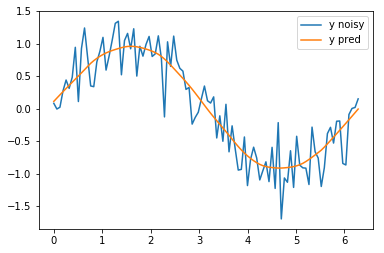

In [13]:





if __name__ == '__main__':


In [12]:

"""

# Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#
# License: BSD (3-clause)

from math import ceil
import numpy as np
from scipy import linalg


def lowess(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

if __name__ == '__main__':
    import math
    n = 100
    x = np.linspace(0, 2 * math.pi, n)
    y = np.sin(x) + 0.3 * np.random.randn(n)

    f = 0.25
    yest = lowess(x, y, f=f, iter=3)

    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='y noisy')
    pl.plot(x, yest, label='y pred')
    pl.legend()
    pl.show()

SyntaxError: invalid syntax (<ipython-input-12-637136d28f35>, line 1)

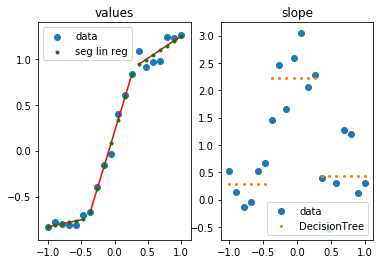

In [14]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# parameters for setup
n_data = 20

# segmented linear regression parameters
n_seg = 3

np.random.seed(0)
fig, (ax0, ax1) = plt.subplots(1, 2)

# example 1
#xs = np.sort(np.random.rand(n_data))
#ys = np.random.rand(n_data) * .3 + np.tanh(5* (xs -.5))

# example 2
xs = np.linspace(-1, 1, 20)
ys = np.random.rand(n_data) * .3 + np.tanh(3*xs)

dys = np.gradient(ys, xs)

rgr = DecisionTreeRegressor(max_leaf_nodes=n_seg)
rgr.fit(xs.reshape(-1, 1), dys.reshape(-1, 1))
dys_dt = rgr.predict(xs.reshape(-1, 1)).flatten()

ys_sl = np.ones(len(xs)) * np.nan
for y in np.unique(dys_dt):
    msk = dys_dt == y
    lin_reg = LinearRegression()
    lin_reg.fit(xs[msk].reshape(-1, 1), ys[msk].reshape(-1, 1))
    ys_sl[msk] = lin_reg.predict(xs[msk].reshape(-1, 1)).flatten()
    ax0.plot([xs[msk][0], xs[msk][-1]],
             [ys_sl[msk][0], ys_sl[msk][-1]],
             color='r', zorder=1)

ax0.set_title('values')
ax0.scatter(xs, ys, label='data')
ax0.scatter(xs, ys_sl, s=3**2, label='seg lin reg', color='g', zorder=5)
ax0.legend()

ax1.set_title('slope')
ax1.scatter(xs, dys, label='data')
ax1.scatter(xs, dys_dt, label='DecisionTree', s=2**2)
ax1.legend()

plt.show()

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

n_samples = 500
rng = np.random.RandomState(0)
X = rng.randn(n_samples, 2)
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = (5 * X[:, 0] + np.sin(10 * np.pi * X[:, 0]) - noise)

gbdt_no_cst = HistGradientBoostingRegressor().fit(X, y)
gbdt_cst = HistGradientBoostingRegressor(monotonic_cst=[1, 0]).fit(X, y)
#gbdt_cst = HistGradientBoostingRegressor(monotonic_cst=[1, -1, 0])
disp = plot_partial_dependence(
    gbdt_no_cst, X, features=[0], feature_names=['feature 0'],
    line_kw={'linewidth': 4, 'label': 'unconstrained'})
#plot_partial_dependence(gbdt_cst, X, features=[0],
#    line_kw={'linewidth': 4, 'label': 'constrained'}, ax=disp.axes_)
#disp.axes_[0, 0].plot(X[:, 0], y, 'o', alpha=.5, zorder=-1, label='samples')
#disp.axes_[0, 0].set_ylim(-3, 3); disp.axes_[0, 0].set_xlim(-1, 1)
plt.legend()
plt.show()


TypeError: __init__() got an unexpected keyword argument 'monotonic_cst'

In [22]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.coef_

array([0.71715729, 0.        ])

In [23]:
len(reg.coef_)

2

Automatically created module for IPython interactive environment
Computing regularization path using the LARS ...
.

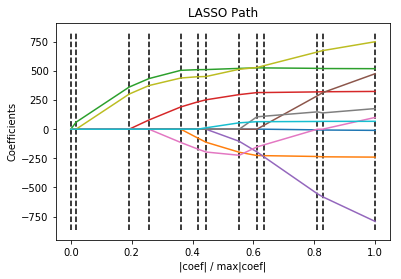

In [24]:
print(__doc__)

# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()